# 1D chain Wannier test

## 1-site test

### 1x1 set by stack 2 half trap together

Nsite = 2

trap_center = [-0.5, 0.5]

reflection = [0, 1, 0, 1]

#### 1D

In [42]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 10
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([2], dtype=int),
    trap=(50, (930, 1250)),
    lc=(0, 1600),
    band=1,
    dim=1,
    avg=1 / 2,
    sparse=True,
    symmetry=True,
    verbosity=0)

k = 6
p_list = sector(dvr)
E_sb = np.array([])
W_sb = []
p_sb = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    print(f'Solve {p} sector.')
    parity = dvr.p.copy()
    parity[:len(p)] = p
    dvr.update_p(parity)

    Em, Wm = dvr.H_solver(k)
    E_sb = np.append(E_sb, Em)
    W_sb += [Wm[:, i].reshape(dvr.n + 1 - dvr.init) for i in range(k)]
    # Parity sector marker
    p_sb = np.append(p_sb, np.tile(p, (k, 1)), axis=0)


# Sort everything by energy, only keetp lowest k states
idx = np.argsort(E_sb)[:k]
E_sb = E_sb[idx]
W_sb = [W_sb[i] for i in idx]
p_sb = p_sb[idx, :]

print(f'E = {E_sb}')
print(f'parity = {p_sb}')

# A, U = singleband_optimize(dvr, E, W, p)
# V = singleband_interaction(dvr, U, U, W, W, p,  p)
# # for i in range(dvr.bands):
# #     mu = np.diag(A[i])  # Diagonals are mu_i
# #     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
# #     print(f'V_{i+1}_i = ', np.real(mu))
# #     print(f't_{i+1}_ij =', abs(t))
# mu = np.diag(A)  # Diagonals are mu_i
# t = -(A - np.diag(mu))  # Off-diagonals are t_ij
# print('V_i = ', np.real(mu))
# print('t_ij =', abs(t))
# print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-0.81764427 -0.48432265 -0.22424979 -0.04447679  0.01983552  0.04584088]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]


##### Lattice 1x1

In [45]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 10
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([1], dtype=int),
    trap=(50, (930, 1250)),
    lc=(0, 1600),
    band=1,
    dim=1,
    avg=1,
    sparse=True,
    verbosity=0)

k = 6
p_list = sector(dvr)
E = np.array([])
W = []
p = np.array([], dtype=int).reshape(0, 3)
for parity in p_list:
    print(f'parity = {parity}')
    E, W, p = solve_sector(parity, dvr, k, E, W, p)
E


parity = (1, 1, 1)


array([-0.81764427, -0.22424979,  0.01983552,  0.09098092,  0.2137715 ,
        0.3775416 ])

#### DVR single-site

In [47]:
from DVR.core import *
import numpy as np

N = 10
R0 = np.array([3, 3, 7.2])
dvr = DVR(np.array([N, 0, 0], dtype=int),
          R0=R0,
          trap=(50, (930, 1250)),
          avg=1,
          sparse=True,
          verbosity=0)
E, W = dvr.H_solver(k=6)
E


array([-0.81764427, -0.48432265, -0.22424979, -0.04447679,  0.01983552,
        0.04584088])

1D matches.

#### 2D

In [37]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 3
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([2], dtype=int),
    trap=(50, 1000),
    lc=(0, 1600),
    band=1,
    dim=2,
    avg=1 / 2,
    sparse=True,
    symmetry=True,
    verbosity=0)

k = 4
p_list = sector(dvr)
E_sb = np.array([])
W_sb = []
p_sb = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    print(f'Solve {p} sector.')
    parity = dvr.p.copy()
    parity[:len(p)] = p
    dvr.update_p(parity)

    Em, Wm = dvr.H_solver(k)
    E_sb = np.append(E_sb, Em)
    W_sb += [Wm[:, i].reshape(dvr.n + 1 - dvr.init) for i in range(k)]
    # Parity sector marker
    p_sb = np.append(p_sb, np.tile(p, (k, 1)), axis=0)


# Sort everything by energy, only keetp lowest k states
idx = np.argsort(E_sb)[:k]
E_sb = E_sb[idx]
W_sb = [W_sb[i] for i in idx]
p_sb = p_sb[idx, :]

print(f'E = {E_sb}')
print(f'parity = {p_sb}')

# A, U = singleband_optimize(dvr, E, W, p)
# V = singleband_interaction(dvr, U, U, W, W, p,  p)
# # for i in range(dvr.bands):
# #     mu = np.diag(A[i])  # Diagonals are mu_i
# #     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
# #     print(f'V_{i+1}_i = ', np.real(mu))
# #     print(f't_{i+1}_ij =', abs(t))
# mu = np.diag(A)  # Diagonals are mu_i
# t = -(A - np.diag(mu))  # Off-diagonals are t_ij
# print('V_i = ', np.real(mu))
# print('t_ij =', abs(t))
# print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-0.89483896 -0.05609852 -0.05162838 -0.03050462]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]]


In [22]:
from DVR.core import *
import numpy as np

N = 3
R0 = np.array([3, 3, 7.2])
dvr = DVR(np.array([N, N, 0], dtype=int),
          R0=R0,
          trap=(50, 1000),
          avg=1,
          sparse=True,
          symmetry=True,
          parity=np.array([1, 1, 0], dtype=int),
          verbosity=0)
Ep, Wp = dvr.H_solver(k=4)
dvr = DVR(np.array([N, N, 0], dtype=int),
          R0=R0,
          trap=(50, 1000),
          avg=1,
          sparse=True,
          symmetry=True,
          parity=np.array([-1, 1, 0], dtype=int),
          verbosity=0)
Em, Wm = dvr.H_solver(k=4)
print(Ep)
print(Em)


[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.05738213 -0.03495152]
 [-0.00528087  0.01050226 -0.03495152  0.05621522]]
[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.05738213 -0.03495152]
 [-0.00528087  0.01050226 -0.03495152  0.05621522]]
[[0.]]
[[[-1.00000000e+00]
  [-1.35335283e-01]
  [-3.35462628e-04]
  [-1.52299797e-08]]

 [[-1.35335283e-01]
  [-1.83156389e-02]
  [-4.53999298e-05]
  [-2.06115362e-09]]

 [[-3.35462628e-04]
  [-4.53999298e-05]
  [-1.12535175e-07]
  [-5.10908903e-12]]

 [[-1.52299797e-08]
  [-2.06115362e-09]
  [-5.10908903e-12]
  [-2.31952283e-16]]]
[[ 0.04687987 -0.0298731   0.00630136]
 [-0.0298731   0.05318123 -0.03226294]
 [ 0.00630136 -0.03226294  0.05434815]]
[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.057382

In [14]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 3
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([1], dtype=int),
    trap=(50, 1000),
    lc=(0, 1600),
    band=1,
    dim=2,
    avg=1,
    sparse=True,
    verbosity=0)

k = 4
dim = 3
p_list = sector(dvr)
E = np.array([])
W = []
p = np.array([], dtype=int).reshape(0, dim)
for parity in p_list:
    print(f'parity = {parity}')
    E, W, p = solve_sector(parity, dvr, k, E, W, p)
E


parity = (1, 1, 1)
[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.05738213 -0.03495152]
 [-0.00528087  0.01050226 -0.03495152  0.05621522]]
[[ 0.05528168 -0.0475278   0.01188195 -0.00528087]
 [-0.0475278   0.06368349 -0.03734137  0.01050226]
 [ 0.01188195 -0.03734137  0.05738213 -0.03495152]
 [-0.00528087  0.01050226 -0.03495152  0.05621522]]
[[0.]]
[[[-1.00000000e+00]
  [-1.35335283e-01]
  [-3.35462628e-04]
  [-1.52299797e-08]]

 [[-1.35335283e-01]
  [-1.83156389e-02]
  [-4.53999298e-05]
  [-2.06115362e-09]]

 [[-3.35462628e-04]
  [-4.53999298e-05]
  [-1.12535175e-07]
  [-5.10908903e-12]]

 [[-1.52299797e-08]
  [-2.06115362e-09]
  [-5.10908903e-12]
  [-2.31952283e-16]]]


array([-0.89483896, -0.05162838, -0.03050462,  0.01945654])

## 1D DVR Wannier

### 4x1

In [2]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(100, 1600),
    band=1,
    dim=1,
    avg=1 / 2,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = eigen_basis(dvr)
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-1.71335076 -1.26355682 -0.86696566 -0.52883635]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]
detU = 1.0000000000000004
V_i =  [-44.38318464 -64.93455519 -64.93455519 -44.38318464]
t_ij = [[ 0.         14.28840378  3.96110339  1.6564638 ]
 [14.28840378  0.         18.04161743  3.96110339]
 [ 3.96110339 18.04161743  0.         14.28840378]
 [ 1.6564638   3.96110339 14.28840378  0.        ]]
U_i = [3.25790231 4.09997436 4.09997436 3.25790231]


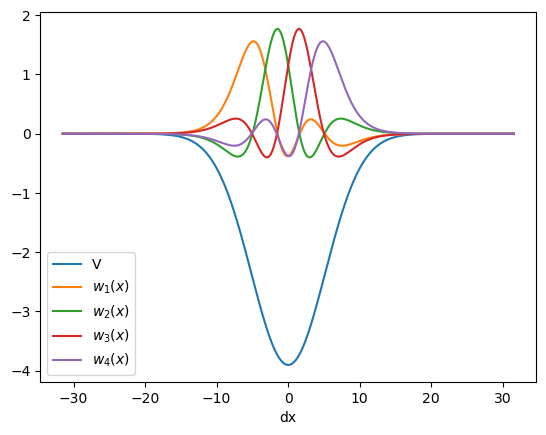

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = dvr.Vfun(*X)
plt.plot(x / dvr.lc[0], v[:, 0, 0], label='V')
plt.plot(x / dvr.lc[0],
         fix_phase(wannier_func(dvr, W, U, p,
                                [x, y, z])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


In [11]:
from scipy.integrate import simps, dblquad
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])


def intgrl3d(integrand: np.ndarray, x: list[float, float, float]) -> float:
    for i in range(dim):
        if dx[i] > 0:
            integrand = simps(integrand, x[i], axis=0)
        else:
            integrand = integrand[0]
    return integrand


X = [x, y, z]
wf = wannier_func(dvr, W, U, p, X)
print(intgrl3d(wf[:, :, :, 0] * wf[:, :, :, 1], x=X))
print(intgrl3d(wf[:, :, :, 0] * wf[:, :, :, 2], x=X))
print(intgrl3d(wf[:, :, :, 0] * wf[:, :, :, 3], x=X))
print(intgrl3d(wf[:, :, :, 1] * wf[:, :, :, 2], x=X))
print(intgrl3d(wf[:, :, :, 1] * wf[:, :, :, 3], x=X))


0.0
0.0
0.0
0.0
0.0


#### 4x1 Riemann manifold optimize

In [8]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(100, 1600),
    band=1,
    dim=1,
    avg=1 / 2,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = eigen_basis(dvr)
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p, eig1d=False)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-1.71335076 -1.26355682 -0.86696566 -0.52883635]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]
detU = -1.8822109939021099e-34
V_i =  [-64.9345224  -64.9345224  -64.93459053 -64.93459053]
t_ij = [[ 0.         64.9345224  18.04161305 18.04161305]
 [64.9345224   0.         18.04161305 18.04161305]
 [18.04161305 18.04161305  0.         64.93459053]
 [18.04161305 18.04161305 64.93459053  0.        ]]
U_i = [4.09997315 4.09997315 4.09997571 4.09997571]


So the non alternating parity issue is not the cause of the problem. For 1D, even though eigh is working well, the Riemannian manifold optimization is still giving non-orthogonal states for small distance.

## 2D DVR Wannier

lc = 400, nonphysical Wannier func

In [5]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(400, 1600),
    band=1,
    dim=2,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = eigen_basis(dvr)
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-2.33769044 -1.96919497 -1.61360687 -1.28893511]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]]
detU = 1.0
V_i =  [ -95.46249617  -64.45611051 -105.09026658  -95.46249617]
t_ij = [[ 0.          0.22621387 12.00015005  2.99725227]
 [ 0.22621387  0.          0.22233256  0.22621387]
 [12.00015005  0.22233256  0.         12.00015005]
 [ 2.99725227  0.22621387 12.00015005  0.        ]]
U_i = [5.23420491 2.30297627 6.02230222 5.23420491]


In [2]:
print(W[0].flatten() @ W[2].flatten())
print(W[0].flatten() @ W[3].flatten())
print(W[2].flatten() @ W[3].flatten())


-1.6653345369376885e-16
2.7755575615605996e-17
-2.0816681718880222e-17


p=1 sector vectors are orthogonal.

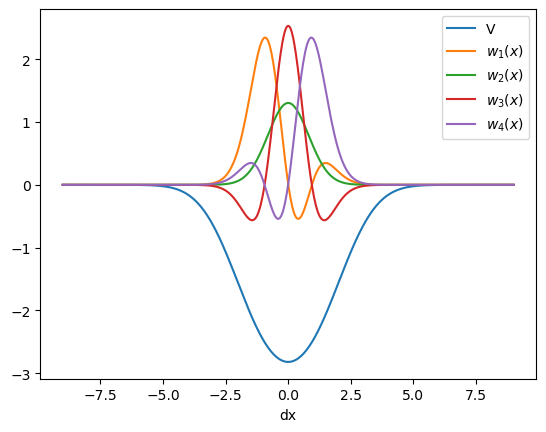

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
X = np.meshgrid(x, y, z, indexing='ij')
v = dvr.Vfun(*X)
plt.plot(x / dvr.lc[0], v[:, 0, 0], label='V')
plt.plot(x / dvr.lc[0],
         fix_phase(wannier_func(dvr, W, U, p,
                                [x, y, z])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


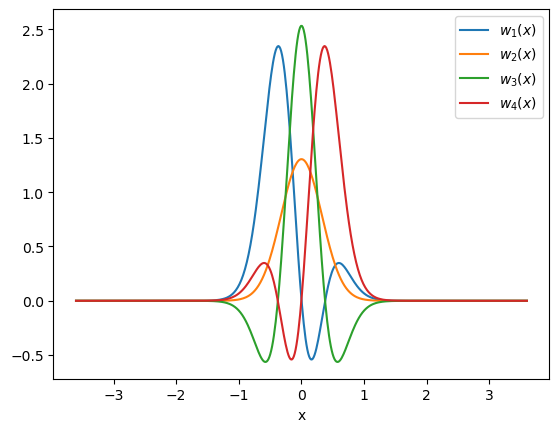

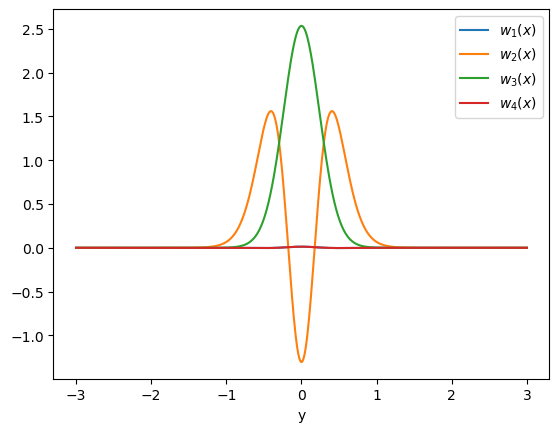

In [4]:
import matplotlib.pyplot as plt
from tools.fix_phase import fix_phase

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x,
         fix_phase(wannier_func(dvr, W, U, p,
                                [x, y, z])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('x')
plt.legend()

plt.figure()
x = np.array([0])
y = np.linspace(-dvr.R0[1], dvr.R0[1], 500)
z = np.array([0])
plt.plot(y,
         fix_phase(wannier_func(dvr, W, U, p,
                                [x, y, z])[0, :, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('y')
plt.legend()


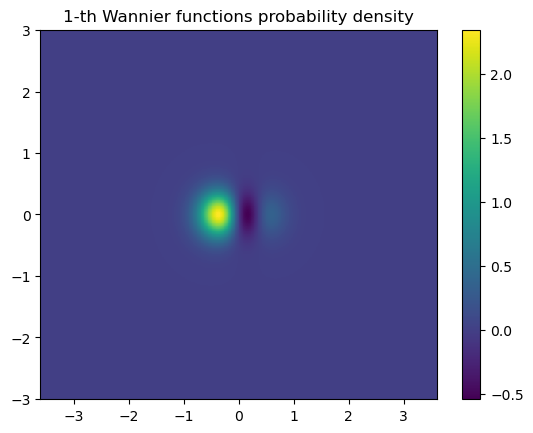

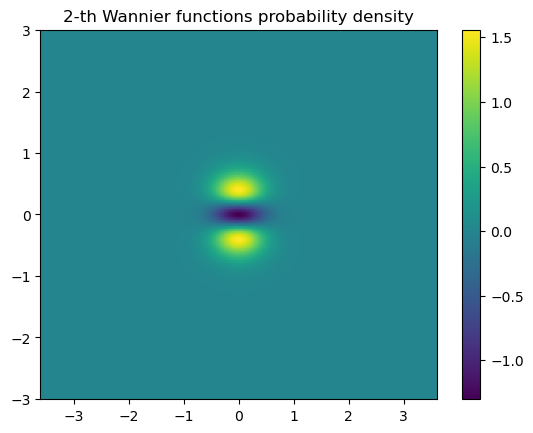

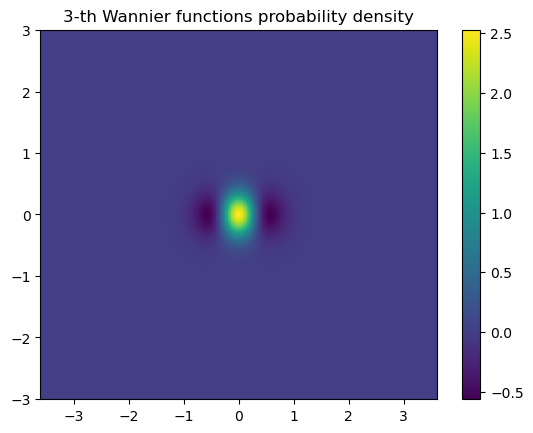

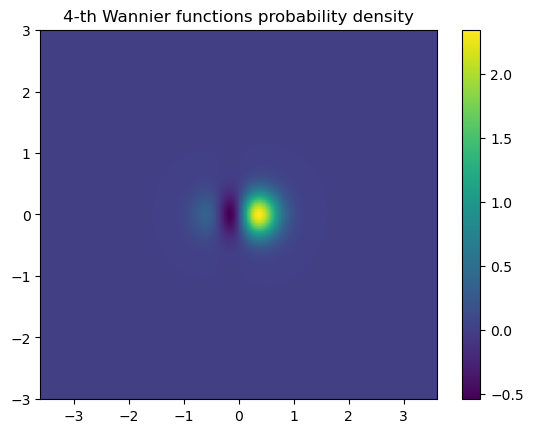

In [5]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.linspace(-dvr.R0[1], dvr.R0[1], 500)
z = np.array([0])
wx = wannier_func(dvr, W, U, p, (x, y, z))
X = np.meshgrid(x, y, indexing='ij')

for i in range(dvr.Nsite):
    Wx = fix_phase(wx[..., 0, i], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


In [8]:
from scipy.integrate import simps, dblquad
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.linspace(-dvr.R0[1], dvr.R0[1], 500)
z = np.array([0])


def intgrl3d(integrand: np.ndarray, x: list[np.ndarray, np.ndarray, np.ndarray]) -> float:
    for i in range(dim):
        if x[i].size > 1:
            integrand = simps(integrand, x[i], axis=0)
        else:
            integrand = integrand[0]
    return integrand


X = [x, y, z]
wf = wannier_func(dvr, W, U, p, X)
print(intgrl3d(wf[:, :, :, 0] * wf[:, :, :, 1], x=X))
print(intgrl3d(wf[:, :, :, 0] * wf[:, :, :, 2], x=X))
print(intgrl3d(wf[:, :, :, 0] * wf[:, :, :, 3], x=X))
print(intgrl3d(wf[:, :, :, 1] * wf[:, :, :, 2], x=X))
print(intgrl3d(wf[:, :, :, 1] * wf[:, :, :, 3], x=X))


-1.8669042108248814e-10
-9.021988082949966e-12
-7.340253731949976e-12
-6.547337437487939e-10
1.8669044883806375e-10


Nonzero because not all components are integrated.

lc = 500

In [20]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(500, 1600),
    band=1,
    dim=2,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = eigen_basis(dvr)
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-2.01062645 -1.74239573 -1.46838736 -1.19656363]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]
detU = 1.0000000000000004
V_i =  [-74.72105072 -85.72827842 -85.72827842 -74.72105072]
t_ij = [[ 0.         10.77816461  2.86763781  1.2457484 ]
 [10.77816461  0.         12.25561301  2.86763781]
 [ 2.86763781 12.25561301  0.         10.77816461]
 [ 1.2457484   2.86763781 10.77816461  0.        ]]
U_i = [4.6047466  5.58884211 5.58884211 4.6047466 ]


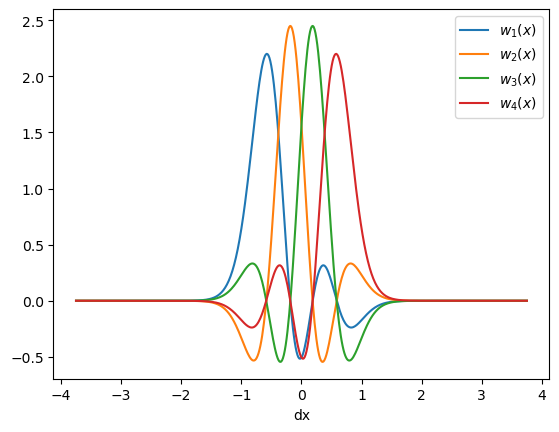

In [76]:
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x,
         fix_phase(wannier_func(dvr, W, U, p,
                                [x, y, z])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


## 3D DVR Wannier

lc = 1000, nonphysical Wannier func

In [63]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([5], dtype=int),
    trap=(50, 1000),
    lc=(1000, 1600),
    band=1,
    dim=3,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = eigen_basis(dvr)
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-1.02903479 -1.00012305 -0.95473874 -0.94508601 -0.9150626 ]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1  1  1]
 [-1  1  1]]
V_i =  [-49.69353779 -46.50984475 -49.79549394 -46.50984475 -49.69353779]
t_ij = [[0.         0.12549885 1.30348991 0.03227546 0.30675377]
 [0.12549885 0.         0.09015822 0.75085388 0.03227546]
 [1.30348991 0.09015822 0.         0.09015822 1.30348991]
 [0.03227546 0.75085388 0.09015822 0.         0.12549885]
 [0.30675377 0.03227546 1.30348991 0.12549885 0.        ]]
U_i = [0.85694011 0.37679013 0.81770872 0.37679013 0.85694011]


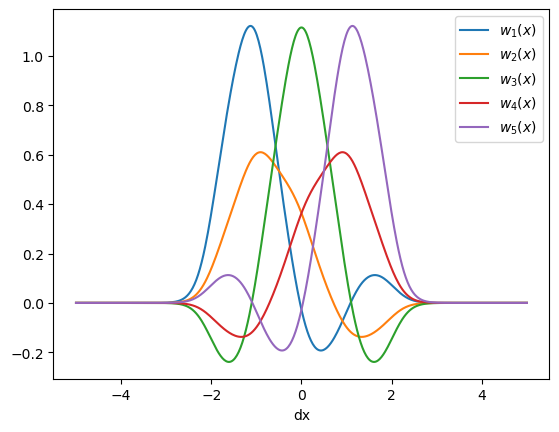

In [64]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x,
         fix_phase(wannier_func(dvr, W, U, p,
                                [x, y, z])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


lc = 1400

In [73]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([5], dtype=int),
    trap=(50, 1000),
    lc=(1400, 1600),
    band=1,
    dim=3,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = eigen_basis(dvr)
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

A, U = singleband_optimize(dvr, E, W, p)
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


Solve (1, 1, 1) sector.
Solve (-1, 1, 1) sector.
E = [-0.73391246 -0.72414651 -0.70953517 -0.68398509 -0.68194716]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]]
detU = -0.9999999999999997
V_i =  [-34.41578044 -35.93496032 -35.97483733 -35.93496032 -34.41578044]
t_ij = [[0.         0.63953829 0.06825176 0.01229159 0.00351421]
 [0.63953829 0.         0.49346129 0.05232484 0.01229159]
 [0.06825176 0.49346129 0.         0.49346129 0.06825176]
 [0.01229159 0.05232484 0.49346129 0.         0.63953829]
 [0.00351421 0.01229159 0.06825176 0.63953829 0.        ]]
U_i = [1.12220375 1.05339776 1.04000908 1.05339776 1.12220375]


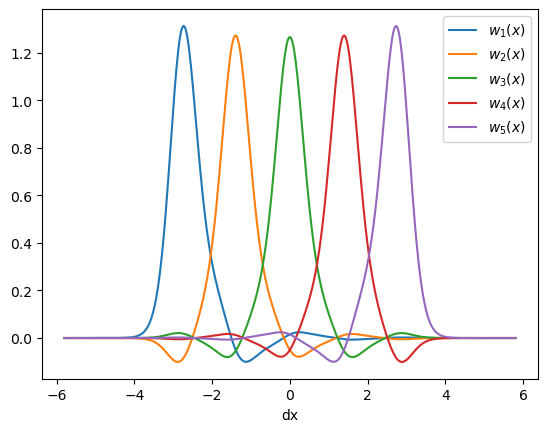

In [59]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x,
         fix_phase(wannier_func(dvr, W, U, p,
                                [x, y, z])[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()


So the 'resolvability' is becoming worse with higher dimension.